Experiment 1

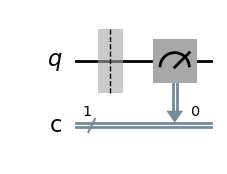

Total counts: {'0': 1000}


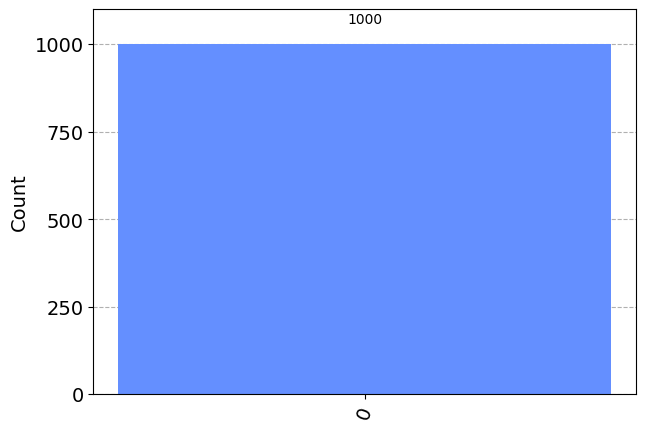

In [3]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## for display
from IPython.display import display

# Create a Quantum Circuit 
qc = QuantumCircuit(1,1)

# Alice encodes the qubit

qc.barrier()

# Bob receives the qubit and measures it

qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
simulator = AerSimulator()
job = simulator.run(qc,shots=1000)
counts = job.result().get_counts()
print("Total counts:",counts)
plot_histogram(counts)


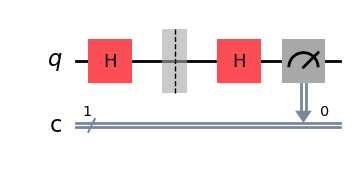

Total counts: {'0': 1000}


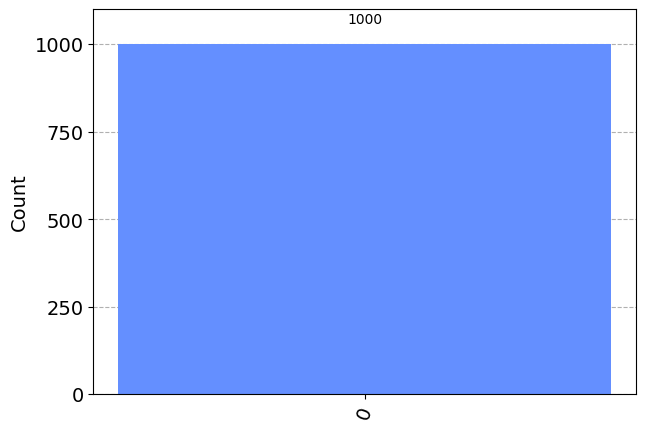

In [5]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## for display
from IPython.display import display

# Create a Quantum Circuit 
qc = QuantumCircuit(1,1)
qc.h(0)
# Alice encodes the qubit

qc.barrier()

# Bob receives the qubit and measures it
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
simulator = AerSimulator()
job = simulator.run(qc,shots=1000)
counts = job.result().get_counts()
print("Total counts:",counts)
plot_histogram(counts)


In [ ]:
#What is your conclusion about the result if Alice and Bob use the same basis?

"""
The qubit information is the same when it is measured with the same basis
"""

Experiment 3

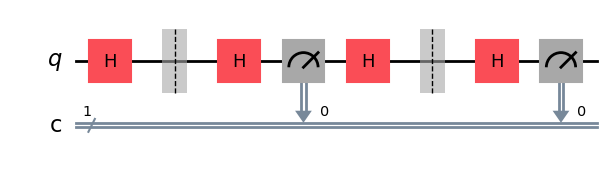

Total counts: {'0': 1000}


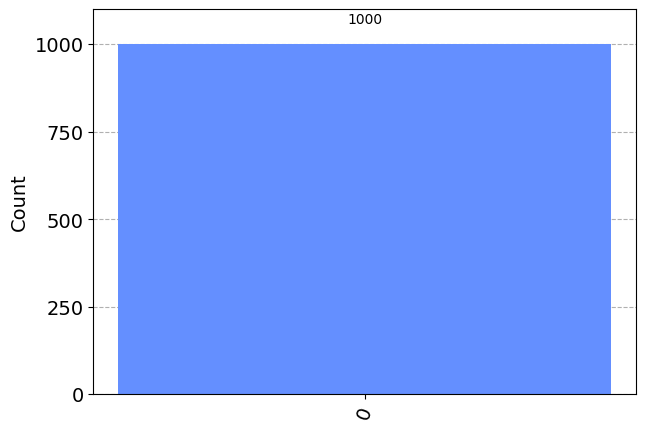

In [6]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## for display
from IPython.display import display

# Create a Quantum Circuit 
qc = QuantumCircuit(1,1)
qc.h(0)
# Alice encodes the qubit

qc.barrier()

# Bob receives the qubit and measures it
qc.h(0)
qc.measure(0,0)
qc.h(0)
qc.barrier()
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
simulator = AerSimulator()
job = simulator.run(qc,shots=1000)
counts = job.result().get_counts()
print("Total counts:",counts)
plot_histogram(counts)


In [7]:
"""
Is there any difference as compared with the result in Experiment 1
(the horizontal direction)? Can Eve’s eavesdropping be detected if Alice, Eve, and Bob use the same
basis?

No, it cannot be deteccted
"""

'\nIs there any difference as compared with the result in Experiment 1\n(the horizontal direction)? Can Eve’s eavesdropping be detected if Alice, Eve, and Bob use the same\nbasis?\n\nNo, it cannot be deteccted\n'

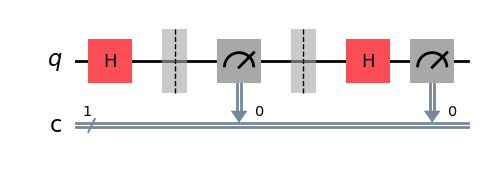

Total counts: {'1': 488, '0': 512}


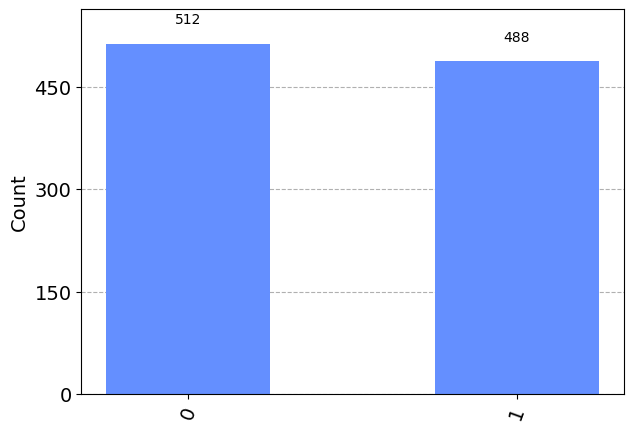

In [8]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## for display
from IPython.display import display

# Create a Quantum Circuit 
qc = QuantumCircuit(1,1)
qc.h(0)
# Alice encodes the qubit

qc.barrier()

# Bob receives the qubit and measures it

qc.measure(0,0)

qc.barrier()
qc.h(0)
qc.measure(0,0)

# Draw and simulate circuit
display(qc.draw())
simulator = AerSimulator()
job = simulator.run(qc,shots=1000)
counts = job.result().get_counts()
print("Total counts:",counts)
plot_histogram(counts)

In [ ]:
"""
Eve got the wrong basis, so it shanged the state of the qubit when it was evesdropping
"""

Experiment2

In [12]:
## original code from https://qiskit.org/textbook/ch-algorithms/quantum-key-distribution.html
## modified based on Bernhardt's book page 53

from numpy.random import randint
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
#from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram


## for display
from IPython.display import display

np.random.seed(seed=23)
n = 1000
four_times_n = 4 * n

def encode_message(bits, bases):
    message = []
    for i in range(four_times_n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 'V': # Prepare qubit in V direction (i.e. Z-basis) 
            if bits[i] == 0:
                pass
            else:
                qc.x(0)
        else: # Prepare qubit in H direction (i.e. X-basis)
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

def measure_message(message, bases):
    backend = AerSimulator()
    measurements = []
    for q in range(four_times_n):
        if bases[q] == 'V': # measuring in V direction 
            message[q].measure(0,0)
        else:               # measuring in H direction 
            message[q].h(0)
            message[q].measure(0,0)
        aer_sim = AerSimulator()
        job = aer_sim.run(message[q], shots=1, memory=True)
        measured_bit = int(job.result().get_memory()[0])
        measurements.append(measured_bit)
    return measurements

def remove_garbage(a_bases, b_bases, bits):
    same_basis_bits = []
    for q in range(four_times_n):
        if a_bases[q] == b_bases[q]:
            # select the bit If both used the same basis
            same_basis_bits.append(bits[q])
    return same_basis_bits

## Step 1 
# Alice generates bits
alice_bits = list(randint(2, size=four_times_n))
print("Alice bits: \n", alice_bits)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
#alice_bases = list( map(lambda bit: 'V' if bit == 0 else 'H', randint(2, size=four_times_n)) )
dir = ['V','H']
alice_bases = list( map(lambda bit: dir[bit], randint(2, size=four_times_n)) )
print("Alice bases: \n", alice_bases)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = list( map(lambda bit: dir[bit], randint(2, size=four_times_n)) )
print("Bob bases: \n", bob_bases)
bob_results = measure_message(message, bob_bases)
print("Bob results: \n", bob_results)

## Step 4
alice_bits_samebasis = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_bits_samebasis = remove_garbage(alice_bases, bob_bases, bob_results)
print("Bob's same-basis bits :\n", bob_bits_samebasis)

## Step 5: The size of the bits which Alice and Bob use the same basis is roughly 2 * n. 
##         Textbook uses half of the bits to compare over the unencrypted line. 



Alice bits: 
 [1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1

In [14]:
sample_size = len(alice_bits_samebasis) // 2
alice_sample = alice_bits_samebasis[0:sample_size]
bob_sample = bob_bits_samebasis[0:sample_size]

print("sample size:", sample_size)
print("alice_sample = ", alice_sample)
print(" bob_sample = " , bob_sample)
print(bob_sample == alice_sample)

sample size: 990
alice_sample =  [0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 

In [5]:
"""
Alice bits: 
 [1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]
Alice bases: 
 ['H', 'V', 'H', 'V', 'H', 'H', 'H', 'V', 'V', 'H', 'V', 'H', 'H', 'V', 'V', 'H']
Bob bases: 
 ['H', 'H', 'H', 'H', 'H', 'V', 'H', 'H', 'V', 'H', 'H', 'V', 'H', 'H', 'V', 'V']
Bob results: 
 [1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1]
 
 same base position: 0,2,4, 6, 8,9, 12, 14
 same bits: 
"""

"\nAlice bits: \n [1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]\nAlice bases: \n ['H', 'V', 'H', 'V', 'H', 'H', 'H', 'V', 'V', 'H', 'V', 'H', 'H', 'V', 'V', 'H']\nBob bases: \n ['H', 'H', 'H', 'H', 'H', 'V', 'H', 'H', 'V', 'H', 'H', 'V', 'H', 'H', 'V', 'V']\nBob results: \n [1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1]\n"

Experiment 4

In [16]:
## original code from https://qiskit.org/textbook/ch-algorithms/quantum-key-distribution.html
## modified based on Bernhardt's book page 53

from numpy.random import randint
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
#from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram


## for display
from IPython.display import display

np.random.seed(seed=23)
n = 1000
four_times_n = 4 * n

def encode_message(bits, bases):
    message = []
    for i in range(four_times_n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 'V': # Prepare qubit in V direction (i.e. Z-basis) 
            if bits[i] == 0:
                pass
            else:
                qc.x(0)
        else: # Prepare qubit in H direction (i.e. X-basis)
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

def measure_message(message, bases):
    backend = AerSimulator()
    measurements = []
    for q in range(four_times_n):
        if bases[q] == 'V': # measuring in V direction 
            message[q].measure(0,0)
        else:               # measuring in H direction 
            message[q].h(0)
            message[q].measure(0,0)
        aer_sim = AerSimulator()
        job = aer_sim.run(message[q], shots=1, memory=True)
        measured_bit = int(job.result().get_memory()[0])
        measurements.append(measured_bit)
    return measurements

def remove_garbage(a_bases, b_bases, bits):
    same_basis_bits = []
    for q in range(four_times_n):
        if a_bases[q] == b_bases[q]:
            # select the bit If both used the same basis
            same_basis_bits.append(bits[q])
    return same_basis_bits

## Step 1 
# Alice generates bits
alice_bits = list(randint(2, size=four_times_n))
#print("Alice bits: \n", alice_bits)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
#alice_bases = list( map(lambda bit: 'V' if bit == 0 else 'H', randint(2, size=four_times_n)) )
dir = ['V','H']
alice_bases = list( map(lambda bit: dir[bit], randint(2, size=four_times_n)) )
#print("Alice bases: \n", alice_bases)
message = encode_message(alice_bits, alice_bases)


##Eve
eve_bases = list( map(lambda bit: dir[bit], randint(2, size=four_times_n)) )
eve_results = measure_message(message, eve_bases)
message = encode_message(eve_results, eve_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = list( map(lambda bit: dir[bit], randint(2, size=four_times_n)) )
#print("Bob bases: \n", bob_bases)
bob_results = measure_message(message, bob_bases)
#print("Bob results: \n", bob_results)

## Step 4
alice_bits_samebasis = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_bits_samebasis = remove_garbage(alice_bases, bob_bases, bob_results)
print("Bob's same-basis bits :\n", bob_bits_samebasis)

## Step 5: The size of the bits which Alice and Bob use the same basis is roughly 2 * n. 
##         Textbook uses half of the bits to compare over the unencrypted line. 



Alice bits: 
 [1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1

In [19]:
sample_size = len(alice_bits_samebasis) // 2
alice_sample = alice_bits_samebasis[0:sample_size]
bob_sample = bob_bits_samebasis[0:sample_size]

print("sample size:", sample_size)
print("alice_sample = ", alice_sample)
print(" bob_sample = " , bob_sample)
print(bob_sample == alice_sample)

counter = 0
for i in range(sample_size):
    if(alice_sample[i] != bob_sample[i]):
        counter = counter +1
print(counter/sample_size)

sample size: 1028
alice_sample =  [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,

Experiment 5

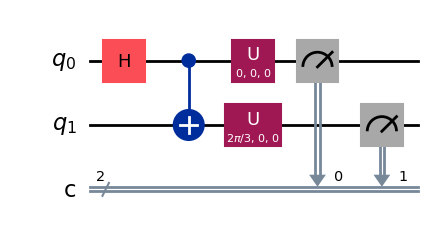

Total counts: {'11': 115, '01': 372, '00': 121, '10': 392}
Agree: 23.6
Disagree: 76.4


In [9]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

from math import pi

## for display
from IPython.display import display

# Create a Quantum Circuit 
qc = QuantumCircuit(2,2)

# entangle two qubits
qc.h(0)

qc.cx(0,1)

# Alice measures qubit 0 
qc.u(0,0,0,0)
qc.measure([0],[0])

# Bob measures qubit 1 
qc.u(2*pi/3,0,0,1)
qc.measure([1],[1])


# Draw and simulate circuit
display(qc.draw())
aersim = AerSimulator()
job = aersim.run(qc,shots=1000)
counts = job.result().get_counts()
print("Total counts:",counts)
plot_histogram(counts)

temp = (counts['00'] + counts['11'])/10
print("Agree:", temp)
apple = 100 - temp
print("Disagree:", apple)


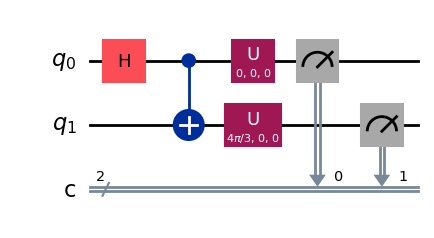

Total counts: {'11': 127, '01': 397, '00': 115, '10': 361}
Agree: 24.2
Disagree: 75.8


In [12]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

from math import pi

## for display
from IPython.display import display

# Create a Quantum Circuit 
qc = QuantumCircuit(2,2)

# entangle two qubits
qc.h(0)

qc.cx(0,1)

# Alice measures qubit 0 
qc.u(0,0,0,0)
qc.measure([0],[0])

# Bob measures qubit 1 
qc.u(4*pi/3,0,0,1)
qc.measure([1],[1])


# Draw and simulate circuit
display(qc.draw())
aersim = AerSimulator()
job = aersim.run(qc,shots=1000)
counts = job.result().get_counts()
print("Total counts:",counts)
plot_histogram(counts)

temp = (counts['00'] + counts['11'])/10
print("Agree:", temp)
apple = 100 - temp
print("Disagree:", apple)


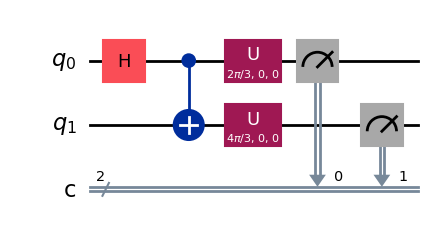

Total counts: {'01': 342, '11': 137, '00': 134, '10': 387}
Agree: 27.1
Disagree: 72.9


In [13]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

from math import pi

## for display
from IPython.display import display

# Create a Quantum Circuit 
qc = QuantumCircuit(2,2)

# entangle two qubits
qc.h(0)

qc.cx(0,1)

# Alice measures qubit 0 
qc.u(2*pi/3,0,0,0)
qc.measure([0],[0])

# Bob measures qubit 1 
qc.u(4*pi/3,0,0,1)
qc.measure([1],[1])


# Draw and simulate circuit
display(qc.draw())
aersim = AerSimulator()
job = aersim.run(qc,shots=1000)
counts = job.result().get_counts()
print("Total counts:",counts)
plot_histogram(counts)

temp = (counts['00'] + counts['11'])/10
print("Agree:", temp)
apple = 100 - temp
print("Disagree:", apple)


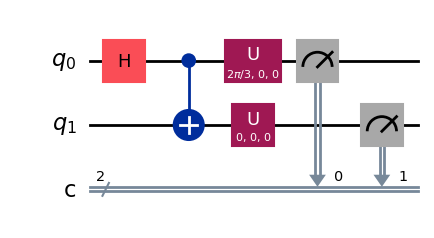

Total counts: {'11': 125, '00': 147, '10': 368, '01': 360}
Agree: 27.2
Disagree: 72.8


In [14]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

from math import pi

## for display
from IPython.display import display

# Create a Quantum Circuit 
qc = QuantumCircuit(2,2)

# entangle two qubits
qc.h(0)

qc.cx(0,1)

# Alice measures qubit 0 
qc.u(2*pi/3,0,0,0)
qc.measure([0],[0])

# Bob measures qubit 1 
qc.u(0,0,0,1)
qc.measure([1],[1])


# Draw and simulate circuit
display(qc.draw())
aersim = AerSimulator()
job = aersim.run(qc,shots=1000)
counts = job.result().get_counts()
print("Total counts:",counts)
plot_histogram(counts)

temp = (counts['00'] + counts['11'])/10
print("Agree:", temp)
apple = 100 - temp
print("Disagree:", apple)


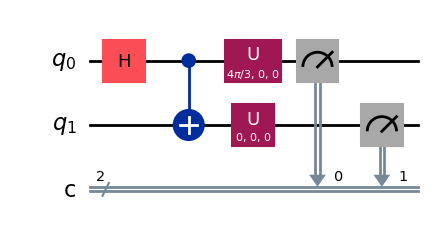

Total counts: {'11': 118, '00': 128, '10': 370, '01': 384}
Agree: 24.6
Disagree: 75.4


In [15]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

from math import pi

## for display
from IPython.display import display

# Create a Quantum Circuit 
qc = QuantumCircuit(2,2)

# entangle two qubits
qc.h(0)

qc.cx(0,1)

# Alice measures qubit 0 
qc.u(4*pi/3,0,0,0)
qc.measure([0],[0])

# Bob measures qubit 1 
qc.u(0,0,0,1)
qc.measure([1],[1])


# Draw and simulate circuit
display(qc.draw())
aersim = AerSimulator()
job = aersim.run(qc,shots=1000)
counts = job.result().get_counts()
print("Total counts:",counts)
plot_histogram(counts)

temp = (counts['00'] + counts['11'])/10
print("Agree:", temp)
apple = 100 - temp
print("Disagree:", apple)


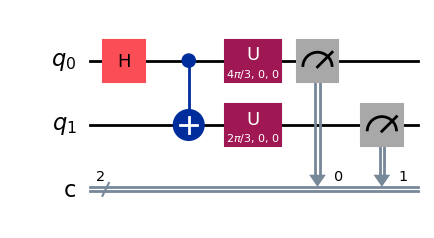

Total counts: {'11': 128, '10': 360, '00': 140, '01': 372}
Agree: 26.8
Disagree: 73.2


In [16]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

from math import pi

## for display
from IPython.display import display

# Create a Quantum Circuit 
qc = QuantumCircuit(2,2)

# entangle two qubits
qc.h(0)

qc.cx(0,1)

# Alice measures qubit 0 
qc.u(4*pi/3,0,0,0)
qc.measure([0],[0])

# Bob measures qubit 1 
qc.u(2*pi/3,0,0,1)
qc.measure([1],[1])


# Draw and simulate circuit
display(qc.draw())
aersim = AerSimulator()
job = aersim.run(qc,shots=1000)
counts = job.result().get_counts()
print("Total counts:",counts)
plot_histogram(counts)

temp = (counts['00'] + counts['11'])/10
print("Agree:", temp)
apple = 100 - temp
print("Disagree:", apple)


Experiment 6

In [3]:
from numpy.random import randint
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import pi

## for display
from IPython.display import display

np.random.seed(seed=23)
n = 1000
three_times_n = 3 * n

def gen_entangled_pairs():
    message = []
    for i in range(three_times_n):
        qc = QuantumCircuit(2,2)
        qc.h(0)
        qc.cx(0,1)
        qc.barrier()
        message.append(qc)
    return message

def measure_message(message, a_bases, b_bases):
    a_measurements = []
    b_measurements = []

    for q in range(three_times_n):

        # Alice measures one of the entangled qubits (i.e. qubit 0) 
        if a_bases[q] == 0:           # measuring in 0 degree 
            message[q].measure(0,0)
        elif a_bases[q] == 1:         # measuring in 120 degree 
            message[q].u(2*pi/3,0,0,0)
            message[q].measure(0,0)
        else: ## i.e. a_bases[q] = 2,   measuring in 240 degree 
            message[q].u(4*pi/3,0,0,0)
            message[q].measure(0,0)

        # Bob measures the other entangled qubit (i.e. qubit 1)
        if b_bases[q] == 0:           # measuring in 0 degree 
            message[q].measure(1,1)
        elif b_bases[q] == 1:         # measuring in 120 degree 
            message[q].u(2*pi/3,0,0,1)
            message[q].measure(1,1)
        else: ## i.e. b_bases[q] = 2,  measuring in 240 degree 
            message[q].u(4*pi/3,0,0,1)
            message[q].measure(1,1)

        aersim = AerSimulator()
        job = aersim.run(message[q], shots=1, memory=True)
        result = job.result()
        # get_memory[0] returns a string with bob's bit first
        a_measured_bit = result.get_memory()[0][1]
        a_measurements.append(a_measured_bit)
        b_measured_bit = result.get_memory()[0][0]
        b_measurements.append(b_measured_bit)
    return a_measurements, b_measurements


alice_bases = randint(3, size=three_times_n)
bob_bases = randint(3, size=three_times_n)

m =  gen_entangled_pairs()
a_bits, b_bits = measure_message(m, alice_bases, bob_bases)

cnt_samebasis = 0
cnt_diffbases = 0
cnt_agree_samebasis = 0
cnt_agree_diffbases = 0
for i in range(three_times_n):
    if alice_bases[i] == bob_bases[i]:
       cnt_samebasis += 1
       if a_bits[i] == b_bits[i] :
          cnt_agree_samebasis += 1

    else:  ## different bases
       cnt_diffbases +=1 
       if a_bits[i] == b_bits[i] :
          cnt_agree_diffbases += 1
 
# the probability that they use same basis
print("Probability that they use same basis:" , "{:0.3f}".format(cnt_samebasis / three_times_n))

# the probability that they AGREE when they use same basis
print("Probability that they AGREE when they use same basis:", "{:0.3f}".format(cnt_agree_samebasis / cnt_samebasis))

# the probability that they use different bases 
print("Probability that they use different bases:", "{:0.3f}".format(cnt_diffbases / three_times_n))

# the probability that they AGREE when they use different bases  
print("Probability that they AGREE when they use different bases :" , "{:0.3f}".format(cnt_agree_diffbases /  cnt_diffbases))


Probability that they use same basis: 0.323
Probability that they AGREE when they use same basis: 1.000
Probability that they use different bases: 0.677
Probability that they AGREE when they use different bases : 0.251


Experiment 7

In [4]:
from numpy.random import randint
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import pi

## for display
from IPython.display import display

np.random.seed(seed=23)
n = 1000
three_times_n = 3 * n

def gen_entangled_pairs():
    message = []
    for i in range(three_times_n):
        qc = QuantumCircuit(2,2)
        qc.h(0)
        qc.cx(0,1)
        qc.barrier()
        message.append(qc)
    return message

def measure_message(message, a_bases, b_bases):
    a_measurements = []
    b_measurements = []

    for q in range(three_times_n):
        message[q].measure(1,1)
        # Alice measures one of the entangled qubits (i.e. qubit 0) 
        if a_bases[q] == 0:           # measuring in 0 degree 
            message[q].measure(0,0)
        elif a_bases[q] == 1:         # measuring in 120 degree 
            message[q].u(2*pi/3,0,0,0)
            message[q].measure(0,0)
        else: ## i.e. a_bases[q] = 2,   measuring in 240 degree 
            message[q].u(4*pi/3,0,0,0)
            message[q].measure(0,0)
        
        
        
        # Bob measures the other entangled qubit (i.e. qubit 1)
        if b_bases[q] == 0:           # measuring in 0 degree 
            message[q].measure(1,1)
        elif b_bases[q] == 1:         # measuring in 120 degree 
            message[q].u(2*pi/3,0,0,1)
            message[q].measure(1,1)
        else: ## i.e. b_bases[q] = 2,  measuring in 240 degree 
            message[q].u(4*pi/3,0,0,1)
            message[q].measure(1,1)

        aersim = AerSimulator()
        job = aersim.run(message[q], shots=1, memory=True)
        result = job.result()
        # get_memory[0] returns a string with bob's bit first
        a_measured_bit = result.get_memory()[0][1]
        a_measurements.append(a_measured_bit)
        b_measured_bit = result.get_memory()[0][0]
        b_measurements.append(b_measured_bit)
    return a_measurements, b_measurements


alice_bases = randint(3, size=three_times_n)
bob_bases = randint(3, size=three_times_n)

m =  gen_entangled_pairs()
a_bits, b_bits = measure_message(m, alice_bases, bob_bases)

cnt_samebasis = 0
cnt_diffbases = 0
cnt_agree_samebasis = 0
cnt_agree_diffbases = 0
for i in range(three_times_n):
    if alice_bases[i] == bob_bases[i]:
       cnt_samebasis += 1
       if a_bits[i] == b_bits[i] :
          cnt_agree_samebasis += 1

    else:  ## different bases
       cnt_diffbases +=1 
       if a_bits[i] == b_bits[i] :
          cnt_agree_diffbases += 1
 
# the probability that they use same basis
print("Probability that they use same basis:" , "{:0.3f}".format(cnt_samebasis / three_times_n))

# the probability that they AGREE when they use same basis
print("Probability that they AGREE when they use same basis:", "{:0.3f}".format(cnt_agree_samebasis / cnt_samebasis))

# the probability that they use different bases 
print("Probability that they use different bases:", "{:0.3f}".format(cnt_diffbases / three_times_n))

# the probability that they AGREE when they use different bases  
print("Probability that they AGREE when they use different bases :" , "{:0.3f}".format(cnt_agree_diffbases /  cnt_diffbases))


Probability that they use same basis: 0.323
Probability that they AGREE when they use same basis: 0.745
Probability that they use different bases: 0.677
Probability that they AGREE when they use different bases : 0.378


In [ ]:
"""
Is the probability that Alice and Bob AGREE the result when they use the same basis still 1 as in the
Experiment 6?
No
"""